In [73]:
import pydriller, datetime, re, pandas as pd, seaborn as sns, json
from tqdm import tqdm

## Task 1: Defect Analysis
Defective hotspots are files where defects are frequently found. We will implement a simple yet effective approach to identify these hotspots by analyzing commit messages for keywords that indicate defect resolutions, such as “fix”, “bug”, “error”, or “issue”. To complete this task, follow the steps described below.

1) <b>Use Git to extract all the commit messages after 2023-01-01. The cutoff date is chosen for computational reasons and will be used for the rest of the tasks as well.
2) Analyze these messages to detect the presence of specific keywords of your choice related to defect fixes.</b>


In [ ]:
cnt = 0
data = []
for commit in pydriller.Repository('transformers/').traverse_commits():
    if commit.author_date.date() >= datetime.date(2023, 1, 1): # enforcing cut off date
        if re.search(r'(fix|bug|error|issue)', commit.msg, re.IGNORECASE): # filtering for presence of defect-related keywords
            data.append({'hash': commit.hash, 'author_date': commit.author_date.date(), 'year_month': commit.author_date.date().strftime('%Y-%m')})
            cnt += 1
            print('hash {}, author date {}'.format(commit.hash, commit.author_date.date()))
df = pd.DataFrame(data)
print(f'Iterated over {cnt} commits total.')
print(data)

hash a3e8d3cb1c0ce87c4e5858ab1c69ea92db360d47, author date 2023-01-03
hash 367fdf3330121a075c06d796bb95dfb1c69c65e4, author date 2023-01-03
hash 305f41e4dea99d9fdc212287263b3748aacc63d3, author date 2023-01-03
hash 9c6f7485a6ab2364f04df5893ab0e09f3c889b5d, author date 2023-01-03
hash 9c9fe89f84f7aa8ec29f19c39a1bf7f1bca82fc3, author date 2023-01-03
hash a9653400d3fac5b316429f641ae61846ae024cc7, author date 2023-01-03
hash 7b0727a4015a7a0fff8bbe3a86acd499ad5880b6, author date 2023-01-03
hash 8f09dd89f62c488f963a635283ce645ea83f522d, author date 2023-01-03
hash e901914da7ec8ac106999526f8a46db4f70c2e4e, author date 2023-01-03
hash cd918492c694bcf4fe8f5ca403f00d1d40ae46ac, author date 2023-01-03
hash 45da7cec5aa1b1bf1031af9caa9085e95e262e11, author date 2023-01-03
hash ce85686a1f425c8e60d9104522d8626395dd507d, author date 2023-01-04
hash b493fee95876e272100bc1d99521df08e91bb9ce, author date 2023-01-04
hash f9e977be70ad52a5321e86c21871fa3979160cc6, author date 2023-01-04
hash 292acd71d6d5305

3) <b>Calculate and plot the total number of defects per month. Why do you think the number of defects dropped sharply in October 2025?</b>

Text(0, 0.5, 'Number of Commits Containing Defect-Related Keywords')

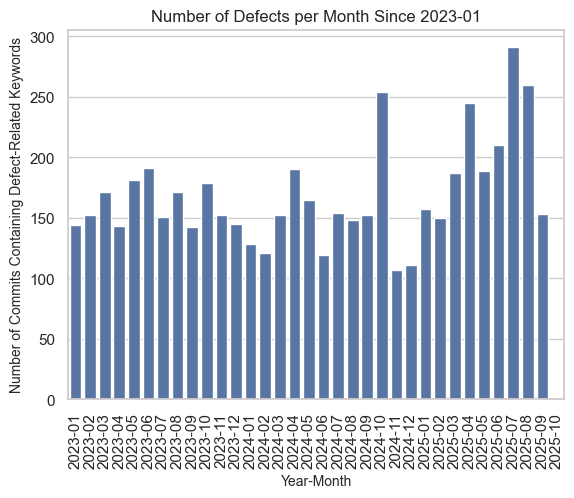

In [64]:
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df.sort_values('year_month')['year_month'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of Defects per Month Since 2023-01')
ax.set_xlabel('Year-Month', fontsize=10)
ax.set_ylabel('Number of Commits Containing Defect-Related Keywords', fontsize=10)

<b>Why do you think the number of defects dropped sharply in October 2025?</b><br>
The plot above shows the number of commits since 2023-01 that contained the keywords "bug", "fix", "error" or "issue" per month. The task was to plot the number of defects per month, which is not technically what we are showing here. Instead, commits containing defect-related keywords usually imply that the referenced defect has been fixed as of the given commit, so it is more precise to say that this plot shows the approximate number of fixes made per month.

Evidently, there is a sharp decline of commits containing defect-related keywords in October 2025. This can be traced back to the overall low number of commits in this month (only 2).

4) <b>Calculate and plot the number of defects per month for the two files with the highest number of defects.</b>

In [ ]:
cnt = 0
data = []
for commit in pydriller.Repository('transformers/').traverse_commits():
    if commit.author_date.date() >= datetime.date(2023, 1, 1):
        if re.search(r'(fix|bug|error|issue)', commit.msg, re.IGNORECASE):
            # adding modified files to the data collected about extracted commits to be able to identify the two files with the highest number of defects later on
            data.append({'hash': commit.hash, 'author_date': commit.author_date.date(), 'year_month': commit.author_date.date().strftime('%Y-%m'), 'modified_files': commit.modified_files})
            cnt += 1
            print('hash {}, author date {}'.format(commit.hash, commit.author_date.date()))
df = pd.DataFrame(data)
print(f'Iterated over {cnt} commits total.')
df.tail(10)

hash a3e8d3cb1c0ce87c4e5858ab1c69ea92db360d47, author date 2023-01-03
hash 367fdf3330121a075c06d796bb95dfb1c69c65e4, author date 2023-01-03
hash 305f41e4dea99d9fdc212287263b3748aacc63d3, author date 2023-01-03
hash 9c6f7485a6ab2364f04df5893ab0e09f3c889b5d, author date 2023-01-03
hash 9c9fe89f84f7aa8ec29f19c39a1bf7f1bca82fc3, author date 2023-01-03
hash a9653400d3fac5b316429f641ae61846ae024cc7, author date 2023-01-03
hash 7b0727a4015a7a0fff8bbe3a86acd499ad5880b6, author date 2023-01-03
hash 8f09dd89f62c488f963a635283ce645ea83f522d, author date 2023-01-03
hash e901914da7ec8ac106999526f8a46db4f70c2e4e, author date 2023-01-03
hash cd918492c694bcf4fe8f5ca403f00d1d40ae46ac, author date 2023-01-03
hash 45da7cec5aa1b1bf1031af9caa9085e95e262e11, author date 2023-01-03
hash ce85686a1f425c8e60d9104522d8626395dd507d, author date 2023-01-04
hash b493fee95876e272100bc1d99521df08e91bb9ce, author date 2023-01-04
hash f9e977be70ad52a5321e86c21871fa3979160cc6, author date 2023-01-04
hash 292acd71d6d5305

,hash,author_date,year_month,modified_files
5556,48a556517925108dc386c990b7c58de3f8ec25d3,2025-09-17,2025-09,[<pydriller.domain.commit.ModifiedFile object ...
5557,6cade29278c4aee3f174f8950f97a3873bdb212f,2025-09-17,2025-09,[<pydriller.domain.commit.ModifiedFile object ...
5558,c5553b41201fe4f83ba020c88740fbb1d073ab22,2025-09-17,2025-09,[<pydriller.domain.commit.ModifiedFile object ...
5559,ecc1d778ce5f521d22d696f4bd98c0f4523898ba,2025-09-17,2025-09,[<pydriller.domain.commit.ModifiedFile object ...
5560,eb04363a0dd52692913f2f026031db3902e2587c,2025-09-17,2025-09,[<pydriller.domain.commit.ModifiedFile object ...
5561,8e837f6ae244cd5be0d9629e695f60b054f16cb5,2025-09-17,2025-09,[<pydriller.domain.commit.ModifiedFile object ...
5562,a2ac4de8b0af2776e3156e72afa7bb8679a3e436,2025-09-17,2025-09,[<pydriller.domain.commit.ModifiedFile object ...
5563,529d3a2b063e8318007111db04d20071b0db1721,2025-09-17,2025-09,[<pydriller.domain.commit.ModifiedFile object ...
5564,58e13b9f129bb0dccc3b51e5da22f45ef3ff0ae7,2025-09-17,2025-09,[<pydriller.domain.commit.ModifiedFile object ...
5565,2ccc6cae21faaf11631efa5fb9054687ae5dc931,2025-10-03,2025-10,[<pydriller.domain.commit.ModifiedFile object ...


In [37]:
with open('data.txt', 'w') as f:
    f.write(str(data))

In [ ]:
# identify the files with the highest number of defects
files = {}
for entry in tqdm(data):
    for file in entry['modified_files']:
        filename = file.filename
        if filename not in files:
            files[filename] = 0
        files[filename] += 1

print("Top 5 modified files:")
top_5_files = sorted(files.items(), key=lambda x: x[1], reverse=True)[:5]
for file, count in top_5_files:
    print(f"{file}: {count} modifications")

5566


100%|██████████| 5566/5566 [00:00<00:00, 9541.57it/s] 

Top 2 modified files:
__init__.py: 1438 modifications
_toctree.yml: 483 modifications
modeling_utils.py: 367 modifications
trainer.py: 300 modifications
modeling_auto.py: 259 modifications


Unsurprisingly, the two files with the greatest number of commits containing defect-related keywords are two configuration files, ```__init.py__``` and ```_toctree.yml```. This is unsurprising, because configuration files are highly coupled with other "normal" files, since configurations often need to changed or updated when changing the source code. 

As was discussed in the lecture, we will omit these two files in our analysis to follow, since changes to configuation files don't indicate problems with these files in the way that frequent changes to a source code file might. As such, we identify the following two files as the ones with the greatest number of commits containing defect-related keywords:
* ```modeling_utils.py```: 367 commits containing defect-related keywords since 2023-01.
* ```trainer.py```: 300 commits containing defect-related keywords since 2023-01.

In [ ]:
# plotting the number of defects per month for the two files with the highest number of defects
file_1_data = []
file_2_data = []
file_combined_data = []
file_1 = "modeling_utils.py"
file_2 = "trainer.py"
for entry in tqdm(data):
    for f in entry['modified_files']:
        if f.filename == file_1:
            file_1_data.append(entry)
        if f.filename == file_2:
            file_2_data.append(entry)
        if f.filename == file_1 or f.filename == file_2:
            file_combined_data.append(entry)

100%|██████████| 5566/5566 [00:02<00:00, 2679.60it/s]


Text(0, 0.5, 'Number of Commits Containing Defect-Related Keywords')

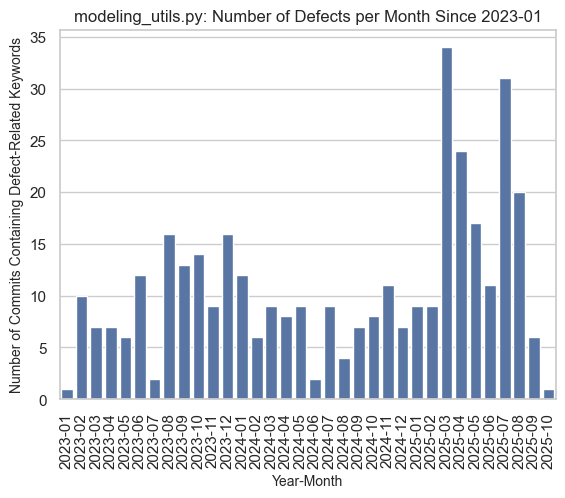

In [68]:
df_file_1 = pd.DataFrame(file_1_data)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df_file_1.sort_values('year_month')['year_month'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('modeling_utils.py: Number of Defects per Month Since 2023-01')
ax.set_xlabel('Year-Month', fontsize=10)
ax.set_ylabel('Number of Commits Containing Defect-Related Keywords', fontsize=10)

Text(0, 0.5, 'Number of Commits Containing Defect-Related Keywords')

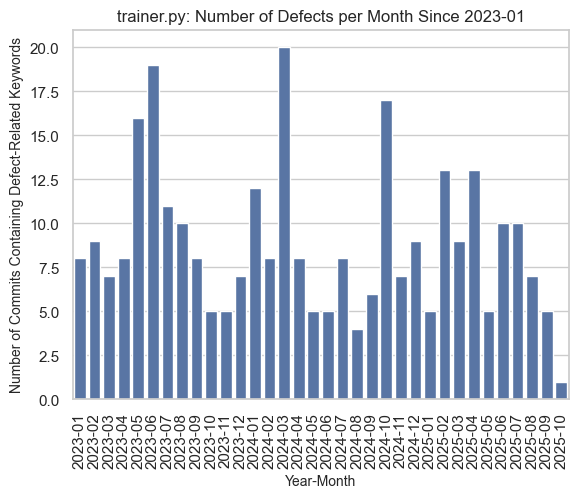

In [69]:
df_file_2 = pd.DataFrame(file_2_data)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df_file_2.sort_values('year_month')['year_month'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('trainer.py: Number of Defects per Month Since 2023-01')
ax.set_xlabel('Year-Month', fontsize=10)
ax.set_ylabel('Number of Commits Containing Defect-Related Keywords', fontsize=10)

Text(0, 0.5, 'Number of Commits Containing Defect-Related Keywords')

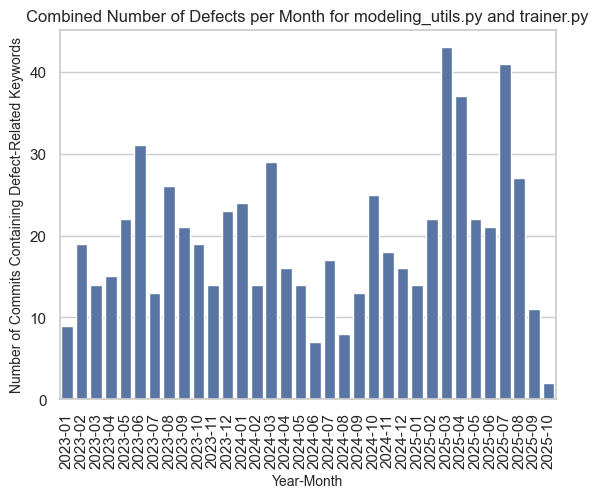

In [72]:
df_combined = pd.DataFrame(file_combined_data)
sns.set_theme(style="whitegrid")
ax = sns.countplot(x=df_combined.sort_values('year_month')['year_month'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('Combined Number of Defects per Month for modeling_utils.py and trainer.py')
ax.set_xlabel('Year-Month', fontsize=10)
ax.set_ylabel('Number of Commits Containing Defect-Related Keywords', fontsize=10)

<b>In which month were the most defects introduced?</b> <br>
The month with the greatest number of commits containing defect-related keywords across both files (```modeling_utils.py``` and ```trainer.py```) is March 2025, with 40+ commits. 

When considering the two files inidividually, ```modeling_utils.py``` had the most commits containing defect-related keywords in March 2025, while ```trainer.py``` had the most commits containing defect-related keywords in March 2024.
  
<b>How would you explain it? Manually examine the repository for that month (e.g., change logs, releases, commit messages) and come up with a hypothesis.</b><br>
TODO!


5) <b>What are the limitations of this method for finding defective hotspots?</b>
Some limitations of this method for finding defective hotspots include:
* This method makes the following assumption: 1 commit containing a defect-related keyword = 1 fix. However, developers do not always follow the best practices for commits. In other words, sometimes, a single commit will include fixes for multiple issues. With the method we have applied here, this commit would only be counted once (since the regular expression can't count the occurrences of matches), even though it should technically be counted multiple times. For example, consider ```commit a40f1ax``` made in March 2025 concerning ```modeling_utils.py```:
    ```
    Fix couples of issues from #36335 (#36453)
    * fix
    * style
    * better allocation
    * fix
    * fix
    * style
    * revert disk
    * exit
    * style
    * return if nothing to cache
    * dtensor guard
    * fix regressiion
    * fix regression
    * fix
    * fix
    ```
    This commit includes multiple fixes, even though our method only counts it once. 
* Another limitation of this method is the fact that all fixes are considered equal. In reality, certain fixes might indicate more serious or complex problems than others.  

## Task 2: Complexity Analysis
<b>Measuring complexity is useful in many cases, like pinpointing refactoring opportunities, and a number of different metrics exist for this task, which are shown in Table 1. A complexity hotspot is a file that might be problematic due to its high complexity. With that in mind, complete the following analysis:</b>

1) <b>Select two complexity metrics of your choice.</b><br>
We have chosen to consider the following two metrics:
    * Lines of code (LoC)
    * Cyclomatic complexity (CC)

2) <b>Calculate the complexity of all .py files in the repository using the selected metrics.</b>

In [ ]:
py_files = {}
for commit in tqdm(data):
    for modified_file in commit["modified_files"]:
        filename = modified_file.filename
        if filename.endswith(".py"):
            loc = modified_file.nloc
            cc = modified_file.complexity
            py_files[filename] = {"loc": loc, "cc": cc}


100%|██████████| 5566/5566 [29:24<00:00,  3.15it/s]  


In [76]:
with open("complexity_metrics.json", "w") as f:
    json.dump(py_files, f, indent=4)

3. <b>Visualize the complexity hotspots. The visualization should effectively convey which parts of the code are more complex or change more frequently. Feel free to use any visualization of your choice and explain the rationale behind your decision.</b>

                                     loc    cc
test_processing_qwen3_omni_moe.py  501.0  71.0
test_modeling_seed_oss.py           98.0   5.0
check_model_tester.py               38.0   0.0
get_test_reports.py                126.0  22.0
important_files.py                  28.0   0.0
7156


Text(0, 0.5, 'Cyclomatic Complexity (CC)')

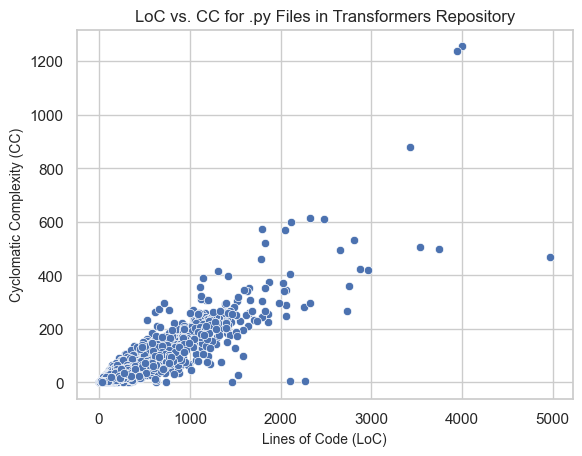

In [ ]:
df_py_files = pd.DataFrame.from_dict(py_files, orient='index')
print(df_py_files.tail(5))
print(df_py_files.size)
sns.set_theme(style="whitegrid")
ax = sns.scatterplot(data=df_py_files, x="loc", y="cc")
ax.set_title('LoC vs. CC for .py Files in Transformers Repository')
ax.set_xlabel('Lines of Code (LoC)', fontsize=10)
ax.set_ylabel('Cyclomatic Complexity (CC)', fontsize=10)

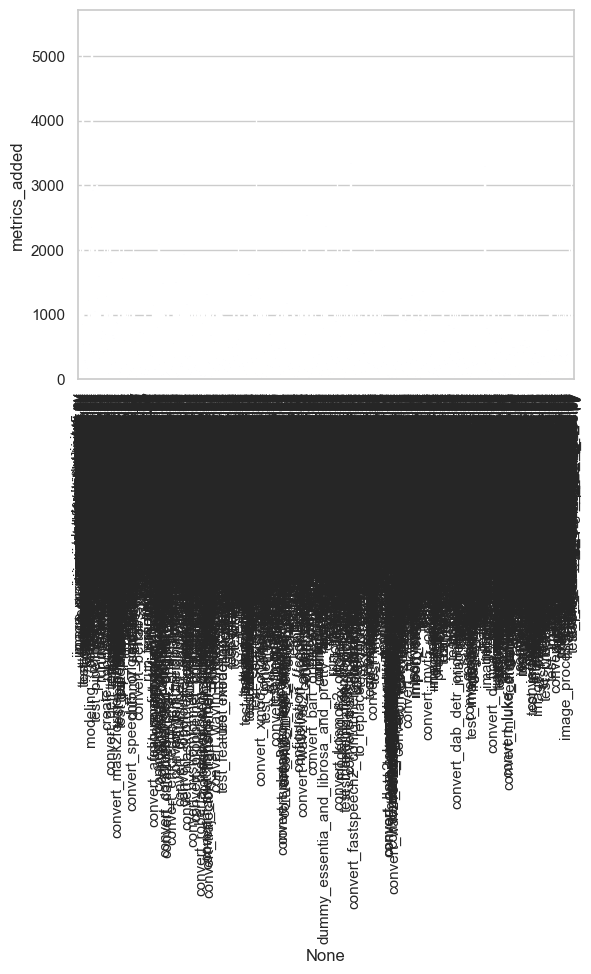

In [ ]:
df_py_files["metrics_added"] = df_py_files["loc"] + df_py_files["cc"]
df_py_files["metrics_mutliplied"] = df_py_files["loc"] * df_py_files["cc"]
sns.set_theme(style="whitegrid")
# TODO: visualize combined metrics.


4. <b>What can you say about the correlation between the two complexity measures in this repository? For example, if you selected CC and LoC, what can you say for the statement “Files with more lines of code tend to have higher cyclomatic complexity”?</b>

Text(0, 0.5, 'Cyclomatic Complexity (CC)')

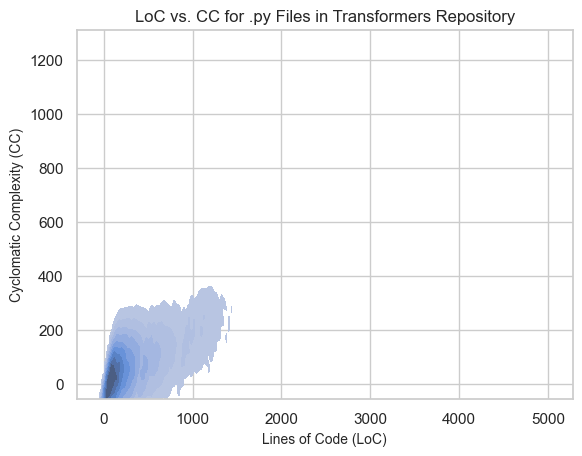

In [97]:
sns.set_theme(style="whitegrid")
ax = sns.kdeplot(data=df_py_files, x="loc", y="cc", fill=True)
ax.set_title('LoC vs. CC for .py Files in Transformers Repository')
ax.set_xlabel('Lines of Code (LoC)', fontsize=10)
ax.set_ylabel('Cyclomatic Complexity (CC)', fontsize=10)

5. <b>A colleague of yours claims that “Files with higher complexity tend to be more defective”. What evidence can you present to support or reject this claim for the selected complexity measures in this repository?</b>

## Task 3: Coupling Analysis
<b>Logical coupling occurs when two seemingly distinct files are functionally related. It can be detected by mining software repositories to see which files tend to be committed together frequently over time. With that in mind, complete the following analysis:</b>